array([0., 0., 0., 0., 0.])

array([0., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.])

array([ 0., -1.,  0.,  1., -2., -1.,  0.,  1.,  2., -3., -2., -1.,  0.,
        1.,  2.,  3.])

(0.12940330697340094+0j)

0j

Text(0.5, 0, 'Saturation parameter (S)')

Error in callback <function _draw_all_if_interactive at 0x0000015EB7BBB9D0> (for post_execute):


KeyboardInterrupt: 

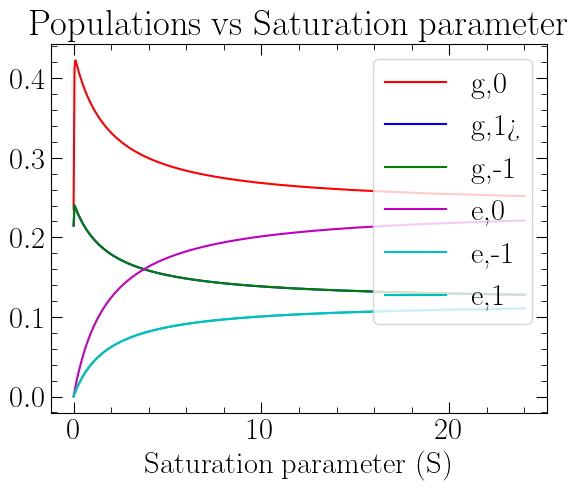

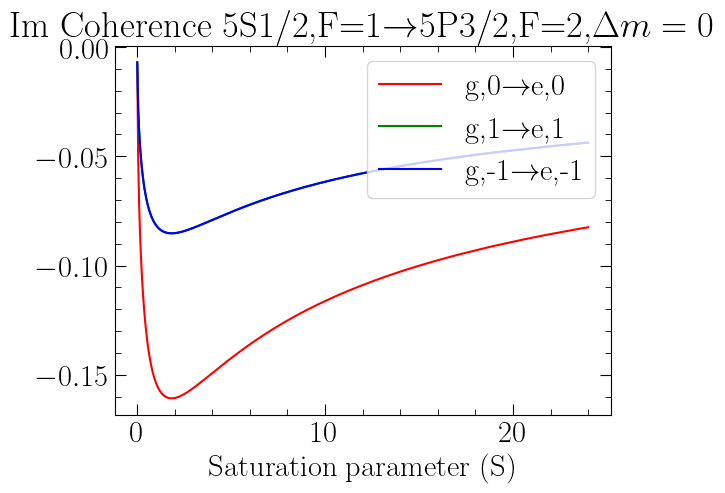

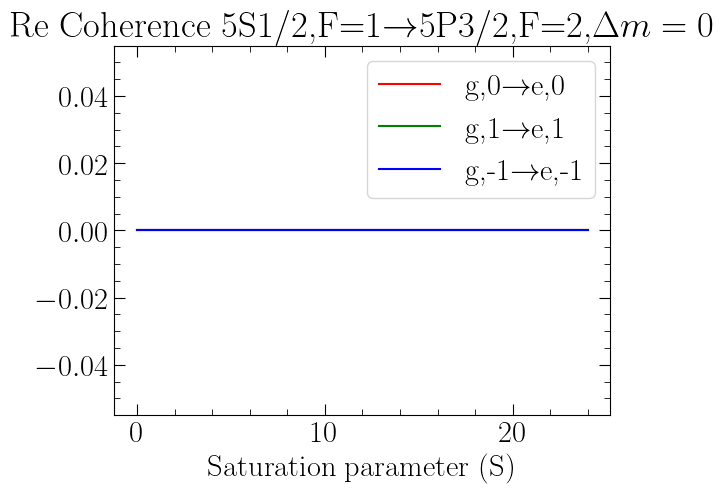

Error in callback <function flush_figures at 0x0000015EBC8BC9D0> (for post_execute):


KeyboardInterrupt: 

In [62]:
###### from qutip import*
from scipy import*
from pylab import *
import scipy.special as sp
import numpy as np
from sympy import*
import arc as arc
import scipy.linalg as ling

plt.rcParams['text.usetex'] = True


def eightbasis():
    ''' Basis for 12x12 matrices

    '''
    one, two, three = qutrit_basis()
    # Note that the three level operators are different
    # from the qutrit operators. A three level atom only
    # has transitions 1 <-> 2 <-> 3, so we define the
    # operators seperately from the qutrit code
    term=np.empty((12,12),dtype=object)
    for i in np.arange(0,12,1):
        for j in np.arange(0,12,1):
            term[i,j]=basis(12,i) * basis(12,j).dag()
   
    
    return term


#System Parameters
w_1 = 2*pi*300.0;
 #Ground State Energy
w_2 = 2*pi*250.0
 #Metastable Raman State
w_3 = 0.0
 #Excited State
mu_0=3.5844E-29



mu_18 = np.sqrt(1.0/30.0)
mu_29=np.sqrt(1.0/10.0)
mu_310=np.sqrt(1.0/5.0)
mu_411=np.sqrt(1.0/3.0)
mu_512=np.sqrt(1.0/2.0)
mu_17 = -np.sqrt(1.0/6.0)
mu_28=-np.sqrt(4.0/15.0)
mu_39=-np.sqrt(3.0/10.0)
mu_410=-np.sqrt(4.0/15.0)
mu_511= -np.sqrt(1.0/6.0)
mu_16 = np.sqrt(1.0/2.0)
mu_27=np.sqrt(1.0/3.0)
mu_38=np.sqrt(1.0/5.0)
mu_49=np.sqrt(1.0/10.0)
mu_510=np.sqrt(1.0/30.0)


s_7=np.sqrt(mu_17**2+mu_27**2)
s_8=np.sqrt(mu_18**2+mu_28**2+mu_38**2)
s_9=np.sqrt(mu_29**2+mu_39**2+mu_49**2)
s_10=np.sqrt(mu_310**2+mu_410**2+mu_510**2)
s_11=np.sqrt(mu_411**2+mu_511**2)

Rabi0=2.25
Gamma=1.0
d0=0.5
zb=eightbasis()
#Zeeman Shifts
B0=0.0E-9
atom = arc.Rubidium87()
#F=2
ens1,fs,mfs=atom.breitRabi(5,0,0.5,np.array([B0]))
ens=atom.breitRabi(5,0,0.5,np.array([B0]))[0][0][3:]
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
ensz=(ens-ens0)
#F=3
enp1,fp,mfp=atom.breitRabi(5,1,1.5,np.array([B0]))
enp=atom.breitRabi(5,1,1.5,np.array([B0]))[0][0][9:]
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
enpz=(enp-enp0)
display(ensz)
display(fp)
display(mfp)

Hint=Rabi0*(0.0*mu_16*(zb[0,5]+zb[5,0])+mu_17*(zb[0,6]+zb[6,0])+0.0*mu_18*(zb[0,7]+zb[7,0])+\
         0.0*mu_27*(zb[1,6]+zb[6,1])+mu_28*(zb[1,7]+zb[7,1])+0.0*mu_29*(zb[1,8]+zb[8,1])+\
         0.0*mu_38*(zb[2,7]+zb[7,2])+mu_39*(zb[2,8]+zb[8,2])+0.0*mu_310*(zb[2,9]+zb[9,2])+\
           0.0*mu_49*(zb[3,8]+zb[8,3])+mu_410*(zb[3,9]+zb[9,3])+0.0*mu_411*(zb[3,10]+zb[10,3])+\
           0.0*mu_510*(zb[4,9]+zb[9,4])+mu_511*(zb[4,10]+zb[10,4])+0.0*mu_512*(zb[4,11]+zb[11,4]))

HprCW=1.0j*1.0E-3/2.0*(-mu_16*(zb[0,5]+zb[5,0])+0.0*mu_17*(zb[0,6]+zb[6,0])+mu_18*(zb[0,7]+zb[7,0])+\
         mu_27*(zb[1,6]+zb[6,1])+0.0*mu_28*(zb[1,7]+zb[7,1])+mu_29*(zb[1,8]+zb[8,1])+\
         mu_38*(zb[2,7]+zb[7,2])+0.0*mu_39*(zb[2,8]+zb[8,2])+mu_310*(zb[2,9]+zb[9,2])+\
           mu_49*(zb[3,8]+zb[8,3])+0.0*mu_410*(zb[3,9]+zb[9,3])+mu_411*(zb[3,10]+zb[10,3])+\
           mu_510*(zb[4,9]+zb[9,4])+0.0*mu_511*(zb[4,10]+zb[10,4])+mu_512*(zb[4,11]+zb[11,4]))

'''
Hzee=(ensz[0]-d0/2)*zb[0,0]+(ensz[1]-d0/2)*zb[1,1]+(ensz[2]-d0/2)*zb[2,2]+(enpz[4]+d0/2)*zb[3,3]+(enpz[5]+d0/2)*zb[4,4]+(enpz[6]+d0/2)*zb[5,5]+\
     (enpz[7]+d0/2)*zb[6,6]+(enpz[8]+d0/2)*zb[7,7]
'''
#HS=Hint+Hzee
HS=Hint



c1=np.sqrt(Gamma)*(1.0*zb[0,5]+mu_27/s_7*zb[1,6]+mu_38/s_8*zb[2,7]+\
    mu_49/s_9*zb[3,8]+mu_510/s_10*zb[4,9])
c2=np.sqrt(Gamma)*(mu_17/s_7*np.sqrt(Gamma)*zb[0,6]+mu_28/s_8*np.sqrt(Gamma)*zb[1,7]+mu_39/s_9*zb[2,8]+\
    mu_410/s_10*zb[3,9]+mu_511/s_11*zb[4,10])
c3=np.sqrt(Gamma)*(mu_18/s_8*zb[0,7]+mu_29/s_9*zb[1,8]+mu_310/s_10*zb[2,9]+\
    mu_411/s_11*zb[3,10]+1.0*zb[4,11])

c_ops=[c1,c2,c3]

rho_ss=steadystate(HS,c_ops)
#display(rho_ss)
display(rho_ss[1,1])
display(rho_ss[5,5])
sat=[]
popgm1=[]
popgm0=[]
popgmm1=[]
popemm1=[]
popem0=[]
popem1=[]
popcohm00=[]
popcohm0m1=[]
popcohm01=[]
popcohm10=[]
popcohm1m1=[]
popcohm11=[]
popcohmm10=[]
popcohmm1m1=[]
popcohmm11=[]
psi0=1.0/5.0*(zb[0,0]+zb[1,1]+zb[2,2]+zb[3,3]+zb[4,4])
#display(zb[0,3])
opts = qutip.Options()
opts.method='bdf'
opts.atol=1.0E-6
opts.rtol=1.0E-6
opts.nsteps=1.0E8
satx=np.linspace(1.0E-6,1.0E-3,500)+np.linspace(1.0E-3,6.0,500)
for k in satx:
    Gamma=1.0
    Rabi0=np.sqrt(k)
    sat.append(4.0*k/(Gamma)**2)
    c1=np.sqrt(Gamma)*(1.0*zb[0,5]+mu_27/s_7*zb[1,6]+mu_38/s_8*zb[2,7]+\
        mu_49/s_9*zb[3,8]+mu_510/s_10*zb[4,9])
    c2=np.sqrt(Gamma)*(mu_17/s_7*np.sqrt(Gamma)*zb[0,6]+mu_28/s_8*np.sqrt(Gamma)*zb[1,7]+mu_39/s_9*zb[2,8]+\
        mu_410/s_10*zb[3,9]+mu_511/s_11*zb[4,10])
    c3=np.sqrt(Gamma)*(mu_18/s_8*zb[0,7]+mu_29/s_9*zb[1,8]+mu_310/s_10*zb[2,9]+\
        mu_411/s_11*zb[3,10]+1.0*zb[4,11])
    c_ops=[c1,c2,c3]
    Hint=Rabi0*(0.0*mu_16*(zb[0,5]+zb[5,0])+mu_17*(zb[0,6]+zb[6,0])+0.0*mu_18*(zb[0,7]+zb[7,0])+\
             0.0*mu_27*(zb[1,6]+zb[6,1])+mu_28*(zb[1,7]+zb[7,1])+0.0*mu_29*(zb[1,8]+zb[8,1])+\
             0.0*mu_38*(zb[2,7]+zb[7,2])+mu_39*(zb[2,8]+zb[8,2])+0.0*mu_310*(zb[2,9]+zb[9,2])+\
               0.0*mu_49*(zb[3,8]+zb[8,3])+mu_410*(zb[3,9]+zb[9,3])+0.0*mu_411*(zb[3,10]+zb[10,3])+\
               0.0*mu_510*(zb[4,9]+zb[9,4])+mu_511*(zb[4,10]+zb[10,4])+0.0*mu_512*(zb[4,11]+zb[11,4]))
    tlist=[0.0,500/Gamma]
    HS=Hint
    pss=mesolve(HS,psi0,tlist,c_ops,[],options=opts).states[-1]
    popgm0.append(pss[2,2])
    popgm1.append(pss[3,3])
    popgmm1.append(pss[1,1])
    popem0.append(pss[8,8])
    popemm1.append(pss[9,9])
    popem1.append(pss[7,7])
    popcohm0m1.append(pss[2,7])
    popcohm00.append(pss[2,8])
    popcohm01.append(pss[2,9])
    popcohmm1m1.append(pss[1,6])
    popcohmm10.append(pss[1,7])
    popcohmm11.append(pss[1,8])
    popcohm1m1.append(pss[3,8])
    popcohm10.append(pss[3,9])
    popcohm11.append(pss[3,10])

f, ax = plt.subplots()
ax.plot(sat, np.real(popgm0), 'r',label='g,0')
ax.plot(sat, np.real(popgm1), 'b',label='g,1>')
ax.plot(sat, np.real(popgmm1), 'g',label='g,-1')
ax.plot(sat, np.real(popem0), 'm',label='e,0')
ax.plot(sat, np.real(popemm1), 'c',label='e,-1')
ax.plot(sat, np.real(popem1), 'c',label='e,1')
ax.legend(loc='upper right')
ax.set_title('Populations vs Saturation parameter')
ax.set_xlabel(r'Saturation parameter (S)')



f, ax = plt.subplots()
ax.plot(sat, np.imag(popcohm00),'r',label=r'g,0$\rightarrow$e,0')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(sat, np.imag(popcohm10),'g',label=r'g,1$\rightarrow$e,1')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(sat, np.imag(popcohmm10),'b',label=r'g,-1$\rightarrow$e,-1')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title(r'Im Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m =0$')
ax.set_xlabel(r'Saturation parameter (S)')

f, ax = plt.subplots()
ax.plot(sat, np.real(popcohm00),'r',label=r'g,0$\rightarrow$e,0')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(sat, np.real(popcohm10),'g',label=r'g,1$\rightarrow$e,1')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(sat, np.real(popcohmm10),'b',label=r'g,-1$\rightarrow$e,-1')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title(r'Re Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m =0$')
ax.set_xlabel(r'Saturation parameter (S)')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(sat, np.real(popcohm0m1),'b',label=r'g,0$\rightarrow$e,-1')
ax.plot(sat, np.real(popcohm01),'g',label=r'g,0$\rightarrow$e,1')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(sat, np.real(popcohm1m1),'r',label=r'g,1$\rightarrow$e,0')
ax.plot(sat, np.real(popcohm11),'c',label=r'g,1$\rightarrow$e,2')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(sat, np.real(popcohmm1m1),'m',label=r'g,-1$\rightarrow$e,-2')
ax.plot(sat, np.real(popcohmm11),'r',label=r'g,-1$\rightarrow$e,0')
ax.legend(loc='upper right')
ax.set_title(r'Re Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m\not =0$')
ax.set_xlabel(r'Saturation parameter (S)')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(sat, np.imag(popcohm0m1),'b',label=r'g,0$\rightarrow$e,-1')
ax.plot(sat, np.imag(popcohm01),'g',label=r'g,0$\rightarrow$e,1')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(sat, np.imag(popcohm1m1),'r',label=r'g,1$\rightarrow$e,0')
ax.plot(sat, np.imag(popcohm11),'c',label=r'g,1$\rightarrow$e,2')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(sat, np.imag(popcohmm1m1),'m',label=r'g,-1$\rightarrow$e,-2')
ax.plot(sat, np.imag(popcohmm11),'r',label=r'g,-1$\rightarrow$e,0')
ax.legend(loc='upper right')
ax.set_title(r'Im Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m\not =0$')
ax.set_xlabel(r'Saturation parameter (S)')


In [59]:
B0=10.0E-9
atom = arc.Rubidium87()
#F=2
ens,fs,mfs=atom.breitRabi(5,0,0.5,np.array([B0]))
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0]
ensz=(ens-ens0)[0]
enp,fp,mfp=atom.breitRabi(5,1,1.5,np.array([B0]))
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0]
enpz=(enp-enp0)[0]
display(ensz)
display(enpz)
#display(fp)
#display(mfp)

#display(atom.breitRabi(5,1,1.5,np.array([0.0])))

array([-7.02364826e+01, -3.81469727e-06,  7.02364793e+01, -1.39915833e+02,
       -6.99579144e+01,  2.86102295e-06,  6.99579186e+01,  1.39915833e+02])

array([-6.04331493e-04, -9.32925996e+01,  4.26411629e-04,  9.32923326e+01,
       -1.86584966e+02, -9.32923855e+01,  1.18970871e-04,  9.32925476e+01,
        1.86584900e+02, -2.79877399e+02, -1.86584900e+02, -9.32924142e+01,
        5.90682030e-05,  9.32925189e+01,  1.86584966e+02,  2.79877400e+02])

In [1]:
Gamma=1.0
Rabi0=1.0
dlt=0.0
D1r=0.

def CW0(t,args):
    return np.exp(-1j*D1r*t)

def CWd(t,args):
    if t>=0.0:
        return np.exp(-1j*dlt*t)
        #return 2.0E-2
    else:
        return 0.0
    
def CW0c(t,args):
    return np.exp(1j*D1r*t)

def CWdc(t,args):
    if t>=0.0:
        return np.exp(1j*dlt*t)
        #return 2.0E-2
    else:
        return 0.0
Hint=Rabi0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))

HprCW=1.0*1.0E-3/2.0*(mu_16*(zb[0,5])+0.0*mu_17*(zb[0,6])+mu_18*(zb[0,7])+\
         mu_27*(zb[1,6])+0.0*mu_28*(zb[1,7])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+0.0*mu_39*(zb[2,8])+mu_310*(zb[2,9])+\
           mu_49*(zb[3,8])+0.0*mu_410*(zb[3,9])+mu_411*(zb[3,10])+\
           mu_510*(zb[4,9])+0.0*mu_511*(zb[4,10])+mu_512*(zb[4,11]))

HprCWy=1.0j*1.0E-3/2.0*(mu_16*(zb[0,5])+0.0*mu_17*(zb[0,6])+mu_18*(zb[0,7])+\
         mu_27*(zb[1,6])+0.0*mu_28*(zb[1,7])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+0.0*mu_39*(zb[2,8])+mu_310*(zb[2,9])+\
           mu_49*(zb[3,8])+0.0*mu_410*(zb[3,9])+mu_411*(zb[3,10])+\
           mu_510*(zb[4,9])+0.0*mu_511*(zb[4,10])+mu_512*(zb[4,11]))

'''
Hzee=(ensz[0]-d0/2)*zb[0,0]+(ensz[1]-d0/2)*zb[1,1]+(ensz[2]-d0/2)*zb[2,2]+(enpz[4]+d0/2)*zb[3,3]+(enpz[5]+d0/2)*zb[4,4]+(enpz[6]+d0/2)*zb[5,5]+\
     (enpz[7]+d0/2)*zb[6,6]+(enpz[8]+d0/2)*zb[7,7]
'''
#HS=Hint+Hzee
HS=Hint





tlist0=[0.0,500/Gamma]
HS2=[[Hint,CW0],[Hint.dag(),CW0c]]
Htot=[[Hint,CW0],[Hint.dag(),CW0c],[HprCW,CWd],[HprCW.dag(),CWdc]]
psi0=1.0/5.0*(zb[0,0]+zb[1,1]+zb[2,2]+zb[3,3]+zb[4,4])
pss0=mesolve(HS2,psi0,tlist0,c_ops,[],options=opts).states[-1]
display(pss0)
tlist=np.linspace(0.0,200.0/Gamma,1000)


pslist=mesolve(Htot,pss0,tlist,c_ops,[],options=opts).states
#display(pslist)

f, ax = plt.subplots()
ax.plot(tlist, np.real([x[1,1] for x in pslist]),label='|g,m=0>')
ax.plot(tlist, np.real([x[2,2] for x in pslist]), 'b',label='|g,m=1$>$')
ax.plot(tlist, np.real([x[0,0] for x in pslist]), 'g',label='|g,m=-1>')
ax.plot(tlist, np.real([x[5,5] for x in pslist]), 'm',label='|e,m=0>')
ax.plot(tlist, np.real([x[4,4] for x in pslist]), 'c',label='|e,m=-1>')
ax.plot(tlist, np.real([x[6,6] for x in pslist]), 'c',label='|e,m=1>')
ax.legend(loc='upper right')
ax.set_title('Populations vs Time')



f, ax = plt.subplots()
ax.plot(tlist, -np.imag([(mu_16*(x[0,5])+mu_18*(x[0,7])+mu_27*(x[1,6])+mu_29*(x[1,8])+mu_38*(x[2,7])+mu_310*(x[2,9])+mu_49*(x[3,8])+mu_411*(x[3,10])+mu_510*(x[4,9])+mu_512*(x[4,11])) for x in pslist]),'r',label='p26')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(tlist, -np.real([(mu_16*(x[0,5])+mu_18*(x[0,7])+mu_27*(x[1,6])+mu_29*(x[1,8])+\
         mu_38*(x[2,7])+mu_310*(x[2,9])+mu_49*(x[3,8])+\
        mu_411*(x[3,10])+mu_510*(x[4,9])+mu_512*(x[4,11])) for x in pslist]),'g',label='p37')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title('Polarization of probe field>')

f, ax = plt.subplots()
ax.plot(tlist, np.imag([x[1,7] for x in pslist]),'r',label='p26')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(tlist, np.imag([x[2,8] for x in pslist]),'g',label='p37')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(tlist, np.imag([x[0,6] for x in pslist]),'b',label='p15')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title('Imag Coherence 5S1/2,5P3/2,F21,dm0>')

f, ax = plt.subplots()
ax.plot(tlist, np.real([x[1,7] for x in pslist]),'r',label='p26')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(tlist, np.real([x[2,8] for x in pslist]),'g',label='p37')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(tlist, np.real([x[0,6] for x in pslist]),'b',label='p15')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title('Real Coherence 5S1/2,5P3/2,F21,dm0>')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(tlist, np.real([x[1,6] for x in pslist]),'b',label='p25')
ax.plot(tlist, np.real([x[1,8] for x in pslist]),'g',label='p27')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(tlist, np.real([x[2,7] for x in pslist]),'r',label='p36')
ax.plot(tlist, np.real([x[2,9] for x in pslist]),'c',label='p38')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(tlist, np.real([x[0,5] for x in pslist]),'m',label='p14')
ax.plot(tlist, np.real([x[0,7] for x in pslist]),'r',label='p16')
ax.legend(loc='upper right')
ax.set_title('Real Coherence 5S1/2,5P3/2,F21,dm!0>')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(tlist, np.imag([x[1,6] for x in pslist]),'b',label='p25')
ax.plot(tlist, np.imag([x[1,8] for x in pslist]),'g',label='p27')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(tlist, np.imag([x[2,7] for x in pslist]),'r',label='p36')
ax.plot(tlist, np.imag([x[2,9] for x in pslist]),'c',label='p38')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(tlist, np.imag([x[0,5] for x in pslist]),'m',label='p14')
ax.plot(tlist, np.imag([x[0,7] for x in pslist]),'r',label='p16')
ax.legend(loc='upper right')
ax.set_title('Imag Coherence 5S1/2,5P3/2,F21,dm!0>')

NameError: name 'mu_16' is not defined

D:\anaconda3\lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(
D:\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


"\nf, ax = plt.subplots()\nax.plot(tlist, np.imag([x[0,5] for x in pslist]), 'g',label=r'g,-1')\nax.plot(tlist, np.imag([x[1,6] for x in pslist]),label=r'g,0')\nax.plot(tlist, np.imag([x[2,7] for x in pslist]), 'b',label=r'g,1')\nax.plot(tlist, np.imag([x[3,8] for x in pslist]), 'm',label=r'e,0')\nax.plot(tlist, np.imag([x[4,9] for x in pslist]), 'c',label=r'e,-1')\nax.plot(tlist, np.imag([x[5,10] for x in pslist]), 'c',label=r'e,1')\nax.legend(loc='upper right')\nax.set_title('Populations vs Time (S=36)')\nax.set_xlabel('Time (1/$\\Gamma$)')\n\nf, ax = plt.subplots()\nax.plot(tlist, np.real([x[1,0] for x in pslist]), 'g',label=r'g,-2')\nax.plot(tlist, np.real([x[1,2] for x in pslist]),label=r'g,-1')\nax.plot(tlist, np.real([x[7,6] for x in pslist]), 'b',label=r'g,0')\nax.plot(tlist, np.real([x[7,8] for x in pslist]), 'c',label=r'g,1')\nax.legend(loc='upper right')\nax.set_title('Ground Populations vs Time (S=36)')\nax.set_xlabel('Time (1/$\\Gamma$)')\n\nf, ax = plt.subplots()\nax.plot

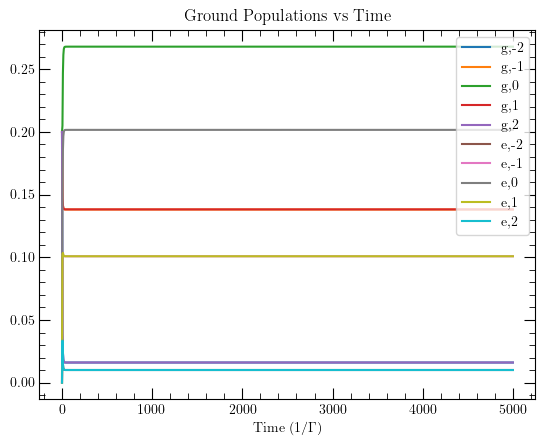

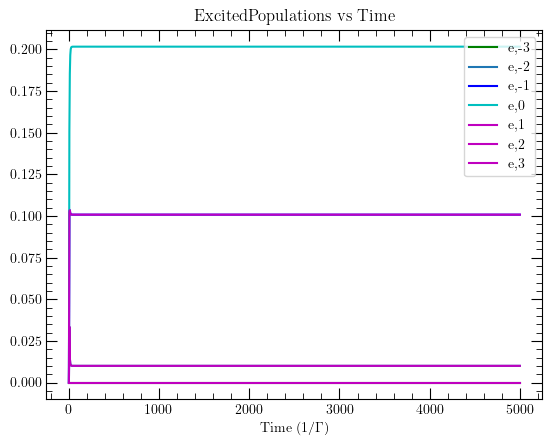

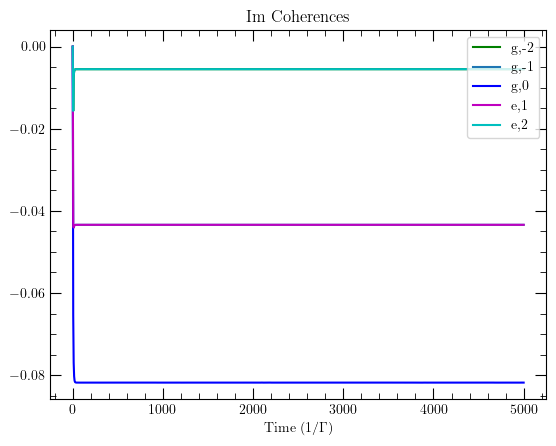

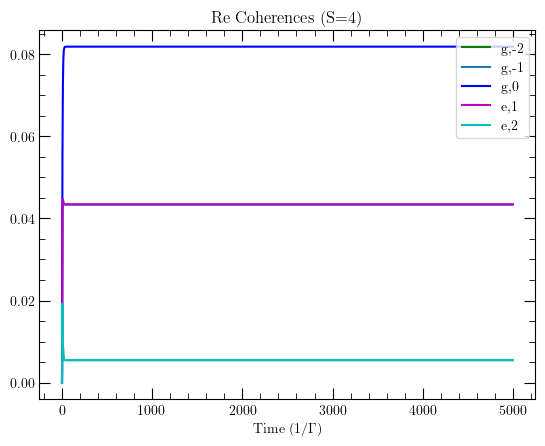

In [1]:
from qutip import*
from scipy import*
from pylab import *
import scipy.special as sp
import numpy as np
from sympy import*
import arc as arc
import scipy.linalg as ling

plt.rcParams['text.usetex'] = True

opts = qutip.Options()
opts.method='bdf'
opts.atol=1.0E-6
opts.rtol=1.0E-6
opts.nsteps=1.0E8



def eightbasis():
    ''' Basis for 12x12 matrices

    '''
    one, two, three = qutrit_basis()
    # Note that the three level operators are different
    # from the qutrit operators. A three level atom only
    # has transitions 1 <-> 2 <-> 3, so we define the
    # operators seperately from the qutrit code
    term=np.empty((12,12),dtype=object)
    for i in np.arange(0,12,1):
        for j in np.arange(0,12,1):
            term[i,j]=basis(12,i) * basis(12,j).dag()
   
    
    return term

mu_18 = 1.0*np.sqrt(1.0/30.0)
mu_29=1.0*np.sqrt(1.0/10.0)
mu_310=1.0*np.sqrt(1.0/5.0)
mu_411=1.0*np.sqrt(1.0/3.0)
mu_512=1.0*np.sqrt(1.0/2.0)
mu_17 = -(1.0)*np.sqrt(1.0/6.0)
mu_28=-1.0*np.sqrt(4.0/15.0)
mu_39=-1.0*np.sqrt(3.0/10.0)
mu_410=-1.0*np.sqrt(4.0/15.0)
mu_511= -1.0*np.sqrt(1.0/6.0)
mu_16 = (1.0)*np.sqrt(1.0/2.0)
mu_27=1.0*np.sqrt(1.0/3.0)
mu_38=1.0*np.sqrt(1.0/5.0)
mu_49=1.0*np.sqrt(1.0/10.0)
mu_510=1.0*np.sqrt(1.0/30.0)

s_7=np.sqrt(mu_17**2+mu_27**2)
s_8=np.sqrt(mu_18**2+mu_28**2+mu_38**2)
s_9=np.sqrt(mu_29**2+mu_39**2+mu_49**2)
s_10=np.sqrt(mu_310**2+mu_410**2+mu_510**2)
s_11=np.sqrt(mu_411**2+mu_511**2)


zb=eightbasis()
#Zeeman Shifts
B0=10000.0E-9


atom = arc.Rubidium87()
#F=2
ens=atom.breitRabi(5,0,0.5,np.array([B0]))[0][0][3:]
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
#F=3
enp=atom.breitRabi(5,1,1.5,np.array([B0]))[0][0][9:]
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
enpz=(enp-enp0)/(2.0*np.pi*6.0E6)



Gamma=1.0
#c1=np.sqrt(Gamma)*(1.0*zb[0,6])
#c2=np.sqrt(Gamma)*(1.0*zb[0,5])
#c_ops=[c1,c2]
Rabi0=2.25
dlt=0.0
D1r=0.5



c1=np.sqrt(Gamma)*(1.0*zb[0,5]+mu_27/s_7*zb[1,6]+mu_38/s_8*zb[2,7]+\
    mu_49/s_9*zb[3,8]+mu_510/s_10*zb[4,9])
c2=np.sqrt(Gamma)*(mu_17/s_7*np.sqrt(Gamma)*zb[0,6]+mu_28/s_8*np.sqrt(Gamma)*zb[1,7]+mu_39/s_9*zb[2,8]+\
    mu_410/s_10*zb[3,9]+mu_511/s_11*zb[4,10])
c3=np.sqrt(Gamma)*(mu_18/s_8*zb[0,7]+mu_29/s_9*zb[1,8]+mu_310/s_10*zb[2,9]+\
    mu_411/s_11*zb[3,10]+1.0*zb[4,11])
c_ops=[c1,c2,c3]
def CW0(t,args):
    return np.exp(-1j*D1r*t)

def CWd(t,args):
    if t>=0.0:
        return np.exp(-1j*dlt*t)
        #return 2.0E-2
    else:
        return 0.0
    
def CW0c(t,args):
    return np.exp(1j*D1r*t)

def CWdc(t,args):
    if t>=0.0:
        return np.exp(1j*dlt*t)
        #return 2.0E-2
    else:
        return 0.0


'''
Hzee=(ensz[0]-d0/2)*zb[0,0]+(ensz[1]-d0/2)*zb[1,1]+(ensz[2]-d0/2)*zb[2,2]+(enpz[4]+d0/2)*zb[3,3]+(enpz[5]+d0/2)*zb[4,4]+(enpz[6]+d0/2)*zb[5,5]+\
     (enpz[7]+d0/2)*zb[6,6]+(enpz[8]+d0/2)*zb[7,7]
'''
#HS=Hint+Hzee

def Probe(t,args):
    return 1.0E-2/2.0*np.exp(-(t-50.0/Gamma)**2/(2*1.0**2))

def CW(t,args):
    if t>30/Gamma:
        return 1.0E-2
        #return 2.0E-2
    else:
        return 0.0
'''
Hint=1.0*Rabi0*(0.0*mu_16*(zb[0,5]+zb[5,0])+mu_17*(zb[0,6]+zb[6,0])+0.0*mu_18*(zb[0,7]+zb[7,0])+\
         0.0*mu_27*(zb[1,6]+zb[6,1])+mu_28*(zb[1,7]+zb[7,1])+0.0*mu_29*(zb[1,8]+zb[8,1])+\
         0.0*mu_38*(zb[2,7]+zb[7,2])+mu_39*(zb[2,8]+zb[8,2])+0.0*mu_310*(zb[2,9]+zb[9,2])+\
           0.0*mu_49*(zb[3,8]+zb[8,3])+mu_410*(zb[3,9]+zb[9,3])+0.0*mu_411*(zb[3,10]+zb[10,3])+\
           0.0*mu_510*(zb[4,9]+zb[9,4])+mu_511*(zb[4,10]+zb[10,4])+0.0*mu_512*(zb[4,11]+zb[11,4]))
'''
H0=D1r*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])

Hint=1.0*Rabi0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))

HprCW=0.0E0/20.0*(mu_16*(zb[0,5])+0.0*mu_17*(zb[0,6])+mu_18*(zb[0,7])+\
         mu_27*(zb[1,6])+0.0*mu_28*(zb[1,7])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+0.0*mu_39*(zb[2,8])+mu_310*(zb[2,9])+\
           mu_49*(zb[3,8])+0.0*mu_410*(zb[3,9])+mu_411*(zb[3,10])+\
           mu_510*(zb[4,9])+0.0*mu_511*(zb[4,10])+mu_512*(zb[4,11]))

HprCWy=0.0E0/20.0*1j*(mu_16*(zb[0,5])+0.0*mu_17*(zb[0,6])+mu_18*(zb[0,7])+\
         mu_27*(zb[1,6])+0.0*mu_28*(zb[1,7])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+0.0*mu_39*(zb[2,8])+mu_310*(zb[2,9])+\
           mu_49*(zb[3,8])+0.0*mu_410*(zb[3,9])+mu_411*(zb[3,10])+\
           mu_510*(zb[4,9])+0.0*mu_511*(zb[4,10])+mu_512*(zb[4,11]))


Hzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]

Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])

tlist0=[0.0,1000/Gamma]
HS21=[[Hint,CW0],[Hint.dag(),CW0c]]
HS22=H0+Hzee+Hint+Hint.dag()
#display(HS21)
Htot2=[HS21,[HprCW,CW]]
psi0=1.0/5.0*(zb[0,0]+zb[1,1]+zb[2,2]+zb[3,3]+zb[4,4])
#psi0=1.0*(zb[0,0])
pss0=mesolve(HS22,psi0,tlist0,c_ops,[],options=opts).states[-1]
#display(pss0)
tlist=np.linspace(0.0,1000.0/Gamma,1000)
tlist00=np.linspace(0.0,5000.0/Gamma,1000)
t2list=np.linspace(0.0/Gamma,1000.0/Gamma,1000)

pslist=mesolve(HS22,psi0,tlist00,c_ops,[],options=opts).states
pssf=pslist[-1]
#display(pssf)
rotpssf= lambda s : (1.0j*s*HS21).expm()*pssf*(-1.0j*s*HS21).expm()
#display(rotpssf(1.0)-rotpssf(0.0))



f, ax = plt.subplots()
ax.plot(tlist00, np.real([x[0,0] for x in pslist]),label=r'g,-2')
ax.plot(tlist00, np.real([x[1,1] for x in pslist]),label=r'g,-1')
ax.plot(tlist00, np.real([x[2,2] for x in pslist]),label=r'g,0')
ax.plot(tlist00, np.real([x[3,3] for x in pslist]),label=r'g,1')
ax.plot(tlist00, np.real([x[4,4] for x in pslist]),label=r'g,2')
ax.plot(tlist00, np.real([x[6,6] for x in pslist]),label=r'e,-2')
ax.plot(tlist00, np.real([x[7,7] for x in pslist]),label=r'e,-1')
ax.plot(tlist00, np.real([x[8,8] for x in pslist]),label=r'e,0')
ax.plot(tlist00, np.real([x[9,9] for x in pslist]),label=r'e,1')
ax.plot(tlist00, np.real([x[10,10] for x in pslist]),label=r'e,2')
ax.legend()
ax.set_title('Ground Populations vs Time ')
ax.set_xlabel('Time (1/$\Gamma$)')
#ax.set_xlim(1800,1870)

f, ax = plt.subplots()
ax.plot(tlist00, np.real([x[5,5] for x in pslist]), 'g',label=r'e,-3')
ax.plot(tlist00, np.real([x[6,6] for x in pslist]),label=r'e,-2')
ax.plot(tlist00, np.real([x[7,7] for x in pslist]), 'b',label=r'e,-1')
ax.plot(tlist00, np.real([x[8,8] for x in pslist]), 'c',label=r'e,0')
ax.plot(tlist00, np.real([x[9,9] for x in pslist]), 'm',label=r'e,1')
ax.plot(tlist00, np.real([x[10,10] for x in pslist]), 'm',label=r'e,2')
ax.plot(tlist00, np.real([x[11,11] for x in pslist]), 'm',label=r'e,3')
ax.legend(loc='upper right')
ax.set_title('ExcitedPopulations vs Time ')
ax.set_xlabel('Time (1/$\Gamma$)')
#ax.set_xlim(1800,1870)

f, ax = plt.subplots()
ax.plot(tlist00, np.imag([x[0,6] for x in pslist]), 'g',label=r'g,-2')
ax.plot(tlist00, np.imag([x[1,7] for x in pslist]),label=r'g,-1')
ax.plot(tlist00, np.imag([x[2,8] for x in pslist]), 'b',label=r'g,0')
ax.plot(tlist00, np.imag([x[3,9] for x in pslist]), 'm',label=r'e,1')
ax.plot(tlist00, np.imag([x[4,10] for x in pslist]), 'c',label=r'e,2')
ax.legend(loc='upper right')
ax.set_title('Im Coherences ')
ax.set_xlabel('Time (1/$\Gamma$)')
#ax.set_xlim(1800,1870)

f, ax = plt.subplots()
ax.plot(tlist00, np.real([x[0,6] for x in pslist]), 'g',label=r'g,-2')
ax.plot(tlist00, np.real([x[1,7] for x in pslist]),label=r'g,-1')
ax.plot(tlist00, np.real([x[2,8] for x in pslist]), 'b',label=r'g,0')
ax.plot(tlist00, np.real([x[3,9] for x in pslist]), 'm',label=r'e,1')
ax.plot(tlist00, np.real([x[4,10] for x in pslist]), 'c',label=r'e,2')
ax.legend(loc='upper right')
ax.set_title('Re Coherences (S=4)')
ax.set_xlabel('Time (1/$\Gamma$)')
#ax.set_xlim(1800,1870)
'''
f, ax = plt.subplots()
ax.plot(tlist, np.imag([x[0,5] for x in pslist]), 'g',label=r'g,-1')
ax.plot(tlist, np.imag([x[1,6] for x in pslist]),label=r'g,0')
ax.plot(tlist, np.imag([x[2,7] for x in pslist]), 'b',label=r'g,1')
ax.plot(tlist, np.imag([x[3,8] for x in pslist]), 'm',label=r'e,0')
ax.plot(tlist, np.imag([x[4,9] for x in pslist]), 'c',label=r'e,-1')
ax.plot(tlist, np.imag([x[5,10] for x in pslist]), 'c',label=r'e,1')
ax.legend(loc='upper right')
ax.set_title('Populations vs Time (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
ax.plot(tlist, np.real([x[1,0] for x in pslist]), 'g',label=r'g,-2')
ax.plot(tlist, np.real([x[1,2] for x in pslist]),label=r'g,-1')
ax.plot(tlist, np.real([x[7,6] for x in pslist]), 'b',label=r'g,0')
ax.plot(tlist, np.real([x[7,8] for x in pslist]), 'c',label=r'g,1')
ax.legend(loc='upper right')
ax.set_title('Ground Populations vs Time (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
ax.plot(tlist, np.imag([x[1,0] for x in pslist]), 'g',label=r'g,-2')
ax.plot(tlist, np.imag([x[1,2] for x in pslist]),label=r'g,-1')
ax.plot(tlist, np.imag([x[7,6] for x in pslist]), 'b',label=r'g,0')
ax.plot(tlist, np.imag([x[7,8] for x in pslist]), 'c',label=r'g,1')
ax.legend(loc='upper right')
ax.set_title('Ground Populations vs Time (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
ax.plot(tlist, np.imag([x[2,8] for x in pslist]),'r',label=r'g,0$\rightarrow$e,0')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(tlist, np.imag([x[3,9] for x in pslist]),'g',label=r'g,1$\rightarrow$e,1')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(tlist, np.imag([x[1,7] for x in pslist]),'b',label=r'g,-1$\rightarrow$e,-1')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper right')
ax.set_title(r'Im Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m=0$ (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
ax.plot(tlist, np.real([x[2,8] for x in pslist]),'r',label=r'g,0$\rightarrow$e,0')
#ax.plot(sat, popcohm0m1,'w',label='p25')
#ax.plot(sat, popcohm01,'g',label='p27')
ax.plot(tlist, np.real([x[3,9] for x in pslist]),'g',label=r'g,1$\rightarrow$e,1')
#ax.plot(sat, popcohm1m1,'r',label='p36')
#ax.plot(sat, popcohm11,'c',label='p38')
ax.plot(tlist, np.real([x[1,7] for x in pslist]),'b',label=r'g,-1$\rightarrow$e,-1')
#ax.plot(sat, popcohmm1m1,'m',label='p14')
#ax.plot(sat, popcohmm11,'r',label='p16')
ax.legend(loc='upper left')
ax.set_title(r'Re Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m=0$ (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(tlist, np.real([x[2,7] for x in pslist]),'b',label=r'g,0$\rightarrow$e,-1')
ax.plot(tlist, np.real([x[2,9] for x in pslist]),'g',label=r'g,0$\rightarrow$e,1')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(tlist, np.real([x[3,8] for x in pslist]),'r',label=r'g,1$\rightarrow$e,0')
ax.plot(tlist, np.real([x[3,10] for x in pslist]),'c',label=r'g,1$\rightarrow$e,2')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(tlist, np.real([x[1,6] for x in pslist]),'m',label=r'g,-1$\rightarrow$e,-2')
ax.plot(tlist, np.real([x[1,8] for x in pslist]),color='orange',label=r'g,-1$\rightarrow$e,0')
ax.legend(loc='upper left')
ax.set_title(r'Re Coh 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m\not =0$ (S=36)')
ax.set_xlabel('Time (1/$\Gamma$)')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(tlist, np.imag([x[2,7] for x in pslist]),'b',label=r'g,0$\rightarrow$e,-1')
ax.plot(tlist, np.imag([x[2,9] for x in pslist]),'g',label=r'g,0$\rightarrow$e,1')
#ax.plot(sat, popcohm10,'g',label='p37')
ax.plot(tlist, np.imag([x[3,8] for x in pslist]),'r',label=r'g,1$\rightarrow$e,0')
ax.plot(tlist, np.imag([x[3,10] for x in pslist]),'c',label=r'g,1$\rightarrow$e,2')
#ax.plot(sat, popcohmm10,'b',label='p15')
ax.plot(tlist, np.imag([x[1,6] for x in pslist]),'m',label=r'g,-1$\rightarrow$e,-2')
ax.plot(tlist, np.imag([x[1,8] for x in pslist]),'--',color='orange',label=r'g,-1$\rightarrow$e,0')
ax.legend(loc='lower right')
ax.set_xlim([30.0,100.0])
#ax.set_ylim([-1.0E-6,5.0E-6])
ax.set_xlabel('Time (1/$\Gamma$)')
ax.set_title(r'Im Coherence 5S1/2,F=1$\rightarrow$5P3/2,F=2,$\Delta m\not =0$ (S=36)')
argz={}

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(t2list, np.real([CW(x,argz)for x in t2list]),'b',label='Probe')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel('Time (1/$\Gamma$)')
ax.legend(loc='upper left')
ax.set_title('Probe pulse')

'''

In [2]:
#Collapse operators
Gamma=1.0

#Spontaneous emission decay
c1=np.sqrt(Gamma)*(1.0*zb[0,5]+mu_27/s_7*zb[1,6]+mu_38/s_8*zb[2,7]+\
    mu_49/s_9*zb[3,8]+mu_510/s_10*zb[4,9])
c2=np.sqrt(Gamma)*(mu_17/s_7*np.sqrt(Gamma)*zb[0,6]+mu_28/s_8*np.sqrt(Gamma)*zb[1,7]+mu_39/s_9*zb[2,8]+\
    mu_410/s_10*zb[3,9]+mu_511/s_11*zb[4,10])
c3=np.sqrt(Gamma)*(mu_18/s_8*zb[0,7]+mu_29/s_9*zb[1,8]+mu_310/s_10*zb[2,9]+\
    mu_411/s_11*zb[3,10]+1.0*zb[4,11])
#Collisional decay

c_ops=[c1,c2,c3]

#Generate superoperators
Ng=5 #Ground state manfold degeneracy
Ne=7 #Excited state manfold degeneracy
Nt=Ng+Ne

#Identity superoperator
Sid=Qobj(np.identity(12 * 12),type="super",superrep="super")
#Zero superoperator
Szro=Qobj(np.zeros((12 *12, 12 * 12)),type="super",superrep="super")
#display(Sid)
#display(Szro+Sid)

#Ground state manifold populations superoperator
Spopg=np.zeros((12 *12, 12 * 12))

for k in np.arange(0,Ng,step=1,dtype=int):
    Spopg[k*(Nt+1),k*(Nt+1)]=1.0
Spopg=Qobj(Spopg,type="super",superrep="super")

#Excited state manifold populations superoperator
Spope=np.zeros((12 *12, 12 * 12))

for k in np.arange(Ng,Nt,step=1,dtype=int):
    Spope[k*(Nt+1),k*(Nt+1)]=1.0
Spope=Qobj(Spope,type="super",superrep="super")

#Translation operator (times tr(rho)) for equilibrium population distribution
Stransg=np.zeros((12 *12, 12 * 12))
eqpop=[1/5,1/5,1/5,1/5,1/5,0,0,0,0,0,0,0]
for k in np.arange(0,Nt,step=1,dtype=int):
    for k2 in np.arange(0,Nt,step=1,dtype=int):
        Stransg[k*(Nt+1),k2*(Nt+1)]=eqpop[k]*1.0
Stransg=Qobj(Stransg,type="super",superrep="super")

display(Stransg[0,2*(Nt+1)])


(0.2+0j)

In [3]:
import qutip as qp

atom = arc.Rubidium87()
ens,fs,mfs=atom.breitRabi(5,0,0.5,np.array([B0]))
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0]
ensz=(ens-ens0)[0]
enp,fp,mfp=atom.breitRabi(5,1,1.5,np.array([B0]))
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0]
enpz=(enp-enp0)[0]

Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])

wlist=np.linspace(-300,300,3000)

R1=4.0
D1=0.0
B1=100.0E-6
def cspectrum_for(R0,dl0,B0x, wlist, c_ops, a_op, b_op, use_pinv=False):
    r"""
    Internal function for calculating the spectrum of the correlation function
    :math:`\left<A(\tau)B(0)\right>`.
    """
    atom = arc.Rubidium87()
    #F=2
    ens=atom.breitRabi(5,0,0.5,np.array([B0x]))[0][0][3:]
    ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
    ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
    #F=3
    enp=atom.breitRabi(5,1,1.5,np.array([B0x]))[0][0][9:]
    enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
    enpz=(enp-enp0)/(2.0*np.pi*6.0E6)

    xH0=(dl0)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
    xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
    xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
    HSx=xH0+xHzee+xHint+xHint.dag()
    L = HSx if issuper(HSx) else liouvillian(HSx, c_ops)

    tr_mat = qp.tensor([qeye(n) for n in L.dims[0][0]])
    N = np.prod(L.dims[0][0])

    A = L.full()
    b = spre(b_op).full()
    a = spre(a_op).full()

    tr_vec = np.transpose(mat2vec(tr_mat.full()))

    rho_ss = steadystate(L)
    rho = np.transpose(mat2vec(rho_ss.full()))

    I = np.identity(N * N)
    P = np.kron(np.transpose(rho), tr_vec)
    Q = I - P

    spectrum = np.zeros(len(wlist))

    for idx, w in enumerate(wlist):
        if use_pinv:
            MMR = np.linalg.pinv(-1.0j * w * I + A)
        else:
            MMR = np.dot(Q, np.linalg.solve(-1.0j * w * I + A, Q))

        s = np.dot(tr_vec,
                   np.dot(a, np.dot(MMR, np.dot(b, np.transpose(rho)))))
        spectrum[idx] = -2 * np.real(s[0, 0])

    return spectrum

def cspectrum_rev(R0,dl0,B0x, wlist, c_ops, a_op, b_op, use_pinv=False):
    r"""
    Internal function for calculating the spectrum of the correlation function
    :math:`\left<A(\tau)B(0)\right>`.
    """
    atom = arc.Rubidium87()
    #F=2
    ens=atom.breitRabi(5,0,0.5,np.array([B0x]))[0][0][3:]
    ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
    ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
    #F=3
    enp=atom.breitRabi(5,1,1.5,np.array([B0x]))[0][0][9:]
    enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
    enpz=(enp-enp0)/(2.0*np.pi*6.0E6)

    xH0=(dl0)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
    xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
    xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
    HSx=xH0+xHzee+xHint+xHint.dag()
    L = HSx if issuper(HSx) else liouvillian(HSx, c_ops)

    tr_mat = qp.tensor([qeye(n) for n in L.dims[0][0]])
    N = np.prod(L.dims[0][0])

    A = L.full()
    b = spost(b_op).full()
    a = spre(a_op).full()

    tr_vec = np.transpose(mat2vec(tr_mat.full()))

    rho_ss = steadystate(L)
    rho = np.transpose(mat2vec(rho_ss.full()))

    I = np.identity(N * N)
    P = np.kron(np.transpose(rho), tr_vec)
    Q = I - P

    spectrum = np.zeros(len(wlist))

    for idx, w in enumerate(wlist):
        if use_pinv:
            MMR = np.linalg.pinv(-1.0j * w * I + A)
        else:
            MMR = np.dot(Q, np.linalg.solve(-1.0j * w * I + A, Q))

        s = np.dot(tr_vec,
                   np.dot(a, np.dot(MMR, np.dot(b, np.transpose(rho)))))
        spectrum[idx] = -2 * np.real(s[0, 0])

    return spectrum

def cspectrum_abs(R0,dl0,B0x, wlist, c_ops, a_op, b_op, use_pinv=False):
    r"""
    Internal function for calculating the spectrum of the correlation function
    :math:`\left<A(\tau)B(0)\right>`.
    """
    atom = arc.Rubidium87()
    #F=2
    ens=atom.breitRabi(5,0,0.5,np.array([B0x]))[0][0][3:]
    ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
    ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
    #F=3
    enp=atom.breitRabi(5,1,1.5,np.array([B0x]))[0][0][9:]
    enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
    enpz=(enp-enp0)/(2.0*np.pi*6.0E6)

    xH0=(dl0)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
    xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
    xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
    HSx=xH0+xHzee+xHint+xHint.dag()
    L = HSx if issuper(HSx) else liouvillian(HSx, c_ops)

    tr_mat = qp.tensor([qeye(n) for n in L.dims[0][0]])
    N = np.prod(L.dims[0][0])

    A = L.full()
    b= spre(b_op).full()
    bt = spost(b_op).full()
    a = spre(a_op).full()

    tr_vec = np.transpose(mat2vec(tr_mat.full()))

    rho_ss = steadystate(L)
    rho = np.transpose(mat2vec(rho_ss.full()))

    I = np.identity(N * N)
    P = np.kron(np.transpose(rho), tr_vec)
    Q = I - P

    spectrum = np.zeros(len(wlist))

    for idx, w in enumerate(wlist):
        if use_pinv:
            MMR = np.linalg.pinv(-1.0j * w * I + A)
        else:
            MMR = np.dot(Q, np.linalg.solve(-1.0j * w * I + A, Q))

        s = np.dot(tr_vec,
                   np.dot(a, np.dot(MMR, np.dot(b-bt, np.transpose(rho)))))
        spectrum[idx] = -2 * np.real(s[0, 0])

    return spectrum

spec=cspectrum_abs(R1,D1,B1,wlist,c_ops,Aop,Aop.dag(), use_pinv=True)
wlist1=[x+D1 for x in wlist]

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wlist1, np.real(spec),'b',label='Re S')
ax.plot(wlist1, np.imag(spec),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}$)")
ax.legend(loc='upper left')
ax.set_title('Absorption spectrum')
ax.set_xlim(D1-10,D1+10)

spec2=cspectrum_rev(R1,D1,B1,wlist,c_ops,Aop,Aop.dag(), use_pinv=True)
wlist1=[x+D1 for x in wlist]

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wlist1, np.real(spec2),'b',label='Re S')
ax.plot(wlist1, np.imag(spec2),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}$)")
ax.legend(loc='upper left')
ax.set_title('Emission spectrum')
#ax.set_xlim(D1-50,D1+50)

KeyboardInterrupt: 

Quantum object: dims = [[[12], [12]], [[12], [12]]], shape = (144, 144), type = super, isherm = True
Qobj data =
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Quantum object: dims = [[[12], [12]], [[12], [12]]], shape = (144, 144), type = super, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

0j

TypeError: identity() missing 1 required positional argument: 'n'

In [15]:
vth=240.0
wlistv=np.linspace(0.0,200.0,1000)

k=1.0E3/(780*6.0)
dsht=k*vth
R1=1.0
D1=0.0 #D1=(w0-wp)
B1=0.0E-6
display(k*vth)

vmin=-500
vmax=500
vlist=np.linspace(vmin,-5.0,1000)
vlist=np.append(vlist,np.linspace(-5.0,5.0,101))
vlist=np.append(vlist,np.linspace(5.0,vmax,1000))
dv=vlist[1]-vlist[0]
dlmax=D1+k*vmax
dlmin=D1+k*vmin
display(k*dv)
display(k*(10/100))

#Spectral lineshapes for a given x-velocity, pump detuning and Rabi frequency

interlst=[]
npts=200
wranv=np.linspace(-10.0,10.0,npts+1)
display(20.0/npts)
#wranv=np.array([0.0,0.1])
abslst=np.array([wranv])
flolst=np.array([wranv])
avabslst=np.zeros(len(wranv))
avflolst=np.zeros(len(wranv))
avabslstR=np.zeros(len(wranv))
avflolstR=np.zeros(len(wranv))
avabslstL=np.zeros(len(wranv))
avflolstL=np.zeros(len(wranv))

#Create
for v in vlist:
    vind=np.where(vlist==v)[0][0]
    if vind == 0:
        px=1.0/(np.sqrt(2.0*np.pi)*vth)*np.exp(-0.5*(v/vth)**2)*(vlist[vind+1]-vlist[vind])
    else:
        px=1.0/(np.sqrt(2.0*np.pi)*vth)*np.exp(-0.5*(v/vth)**2)*(vlist[vind]-vlist[vind-1])
    #Forward propagation (Probe/Sp R directed and Pump R directed )
    wlistv1=[x+D1+(1.0-1.0)*k*v for x in wranv]
    xspecxaR=cspectrum_abs(R1,D1+k*v,B1,wlistv1,c_ops,Aop,Aop.dag(), use_pinv=True)
    xspecxaR= xspecxaR*px
    xspecxeR=cspectrum_rev(R1,D1+k*v,B1,wlistv1,c_ops,Aop,Aop.dag(), use_pinv=True)
    xspecxeR= xspecxeR*px  
    avflolstR=np.add(avflolstR,xspecxeR)   
    avabslstR=np.add(avabslstR,xspecxaR)
    
    #Backward propagation (Probe/Sp L directed and Pump R directed )
    wlistv2=[x+D1+(1.0+1.0)*k*v for x in wranv]
    xspecxaL=cspectrum_abs(R1,D1+k*v,B1,wlistv2,c_ops,Aop,Aop.dag(), use_pinv=True)
    xspecxaL= xspecxaL*px
    xspecxeL=cspectrum_rev(R1,D1+k*v,B1,wlistv2,c_ops,Aop,Aop.dag(), use_pinv=True)
    xspecxeL= xspecxeL*px  
    avflolstL=np.add(avflolstL,xspecxeL)   
    avabslstL=np.add(avabslstL,xspecxaL)


def coretask(arraydata):
    avabslst=np.zeros(len(wranv))
    for v in vlist:
        vind=np.where(vlist==v)[0][0]
        px=1.0/(np.sqrt(2.0*np.pi)*vth)*np.exp(-0.5*(v/vth)**2)*(v[vind+1]-v[vind])
        wlistv1=[x-D1-k*v for x in wranv]
        xspecxa=cspectrum_abs(R1,D1+k*v,B1,wlistv1,c_ops,Aop,Aop.dag(), use_pinv=True)
        xspecxa= xspecxa*px
        avabslst=np.add(avabslst,xspecxa)
        xspecxe=cspectrum_rev(R1,D1+k*v,B1,wlistv1,c_ops,Aop,Aop.dag(), use_pinv=True)
        xspecxe= xspecxe*px  
        avflolst=np.add(avflolst,xspecxe)
        
        return avabslst

'''
display(avabslstR)
display(avflolstR)
display(avabslstL)
display(avflolstL)
'''

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wranv, np.real(avabslstR),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Absorption spectrum R')
ax.set_xlim(-10,10)
#ax.set_ylim(-0.2,0.3)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wranv, np.real(avflolstR),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Emission spectrum R')
ax.set_xlim(-10,10)
#ax.set_ylim(-0.2,0.3)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wranv, np.real(avabslstL),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Absorption spectrum L')
ax.set_xlim(-10,10)
#ax.set_ylim(-0.2,0.3)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wranv, np.real(avflolstL),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Emission spectrum L')
ax.set_xlim(-10,10)
#ax.set_ylim(-0.2,0.3)


51.28205128205128

0.10587510587510773

0.021367521367521368

0.1

OperationalError: no such table: hfsDataAB

In [ ]:
display(

'\nwxlst12,specx12=spectrum_correlation_fft(taulist,corra)\n\nwxlstt12=[x+D1r for x in wxlst12]\n\nf, ax = plt.subplots()\n#ax.plot(sat, popcohm00,\'r\',label=\'p26\')\nax.plot(wxlstt12, np.real(specx12),\'b\',label=\'Re S\')\n\nax.plot(wxlstt12, np.imag(specx12),\'r\',label=\'Im S\')\n#ax.set_xlim([175.0/Gamma,225.0/Gamma])\nax.set_xlabel(r"Frequency ($\\omega_{pr}$)")\nax.legend(loc=\'upper left\')\nax.set_title(\'Direct absorption spectrum\')\nax.set_xlim(-200,200)\n'

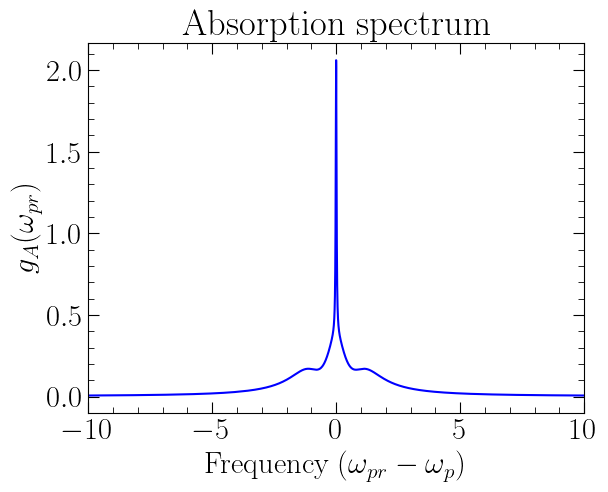

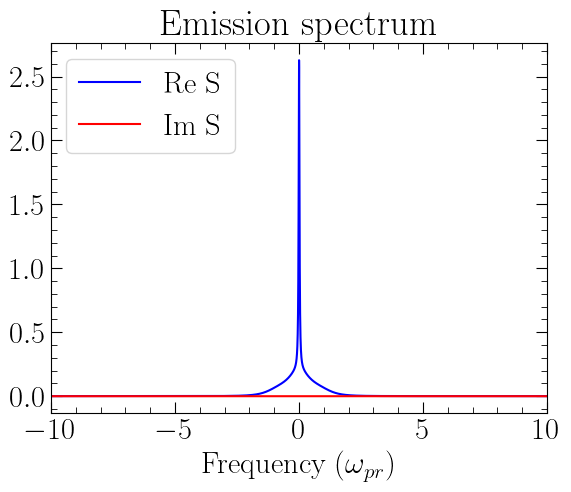

In [151]:
###### import csv as csv
taulist=np.linspace(0.0,4.0E3,int(4.0E5))
wlist=np.linspace(-100,100,10000)
pss00=mesolve(HS22,psi0,np.linspace(-1000.0/Gamma,0.0,100),c_ops,[],options=opts).states[-1]
Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])

plt.rcParams.update({'font.size': 22})
#spec=spectrum(HS21, wlist, c_ops, Aop.dag(), Aop)
corra=correlation_2op_2t(HS22, pss00, [0.0], taulist, c_ops, Aop, Aop.dag(), reverse=False, args={})[0,:]
corrf=correlation_2op_2t(HS22, pss00, [0.0], taulist, c_ops, Aop.dag(), Aop, reverse=True, args={})[0,:]
'''
#Fluorescence spectrum
f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wlist, np.real(spec),'b',label='Re S')
ax.plot(wlist, np.imag(spec),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel('Time (1/$\Gamma$)')
ax.legend(loc='upper left')
ax.set_title('Spectral response')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(taulist, np.real(corra),'b',label='Re S')
ax.plot(taulist, np.imag(corra),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel('Time (1/$\Gamma$)')
ax.legend(loc='upper left')
ax.set_title('Spectral response')

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(taulist, np.real(corrf),'b',label='Re S')
ax.plot(taulist, np.imag(corrf),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel('Time (1/$\Gamma$)')
ax.legend(loc='upper left')
ax.set_title('Spectral response')
'''
wxlst,specx=spectrum_correlation_fft(taulist,corra-corrf)

wxlstt=[x+D1r for x in wxlst]

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlstt, np.real(specx),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Absorption spectrum')
ax.set_xlim(-10,10)

#plt.savefig('Raman001perp.png', bbox_inches='tight')
import pandas as pd
#df = pd.DataFrame(list(zip(wxlst,np.real(specx)))).add_prefix('Col')

#df.to_csv('Fig7data1.csv', index=False)

wxlst11,specx11=spectrum_correlation_fft(taulist,corrf)

wxlstt11=[x+D1r for x in wxlst11]

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlstt11, np.real(specx11),'b',label='Re S')
ax.plot(wxlstt11, np.imag(specx11),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}$)")
ax.legend(loc='upper left')
ax.set_title('Emission spectrum')
ax.set_xlim(-10,10)

'''
wxlst12,specx12=spectrum_correlation_fft(taulist,corra)

wxlstt12=[x+D1r for x in wxlst12]

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlstt12, np.real(specx12),'b',label='Re S')

ax.plot(wxlstt12, np.imag(specx12),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}$)")
ax.legend(loc='upper left')
ax.set_title('Direct absorption spectrum')
ax.set_xlim(-200,200)
'''

0.63012180764266

0.47486726505446697

-0.003946250629021496

2.4100878558605108

0.7128037590239553

0.5

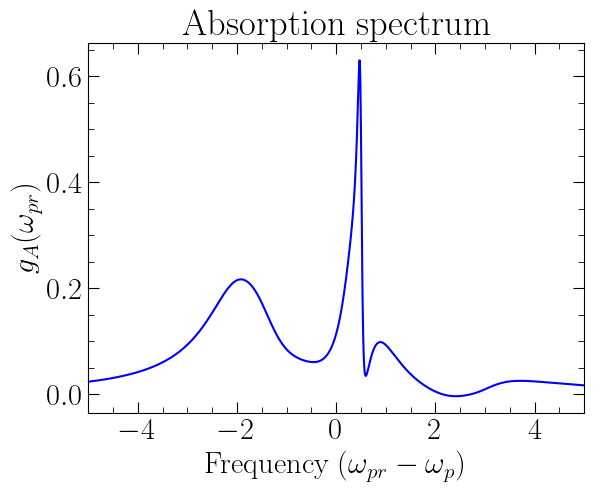

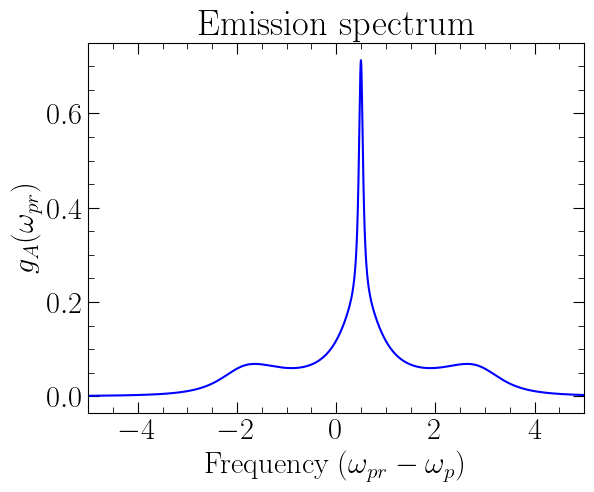

In [102]:
f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlstt, np.real(specx),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Absorption spectrum')
ax.set_xlim(-5,5)
#ax.set_ylim(-0.1,0.2)
##display(np.min(np.real(specx)))
#display(wxlstt[np.argmin(np.real(specx))])

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlstt, np.real(specx11),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Emission spectrum')
ax.set_xlim(-5,5)
#ax.set_ylim(-0.05,0.005)
display(np.max(np.real(specx)))
display(wxlstt[np.argmax(np.real(specx))])
display(np.min(np.real(specx)))
display(wxlstt[np.argmin(np.real(specx))])
#display(np.min(wxlstt11))
#display(np.max(wxlstt11))
display(np.max(np.real(specx11)))
display(wxlstt[np.argmax(np.real(specx11))])

63.034188034188034

4.999999999999999

(-360.0, 360.0)

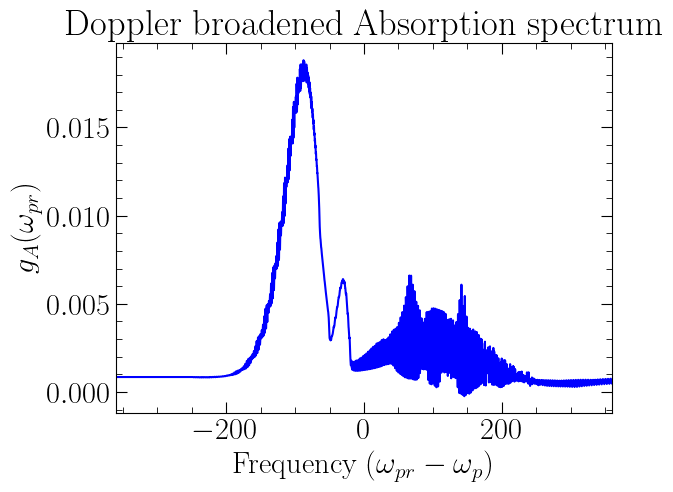

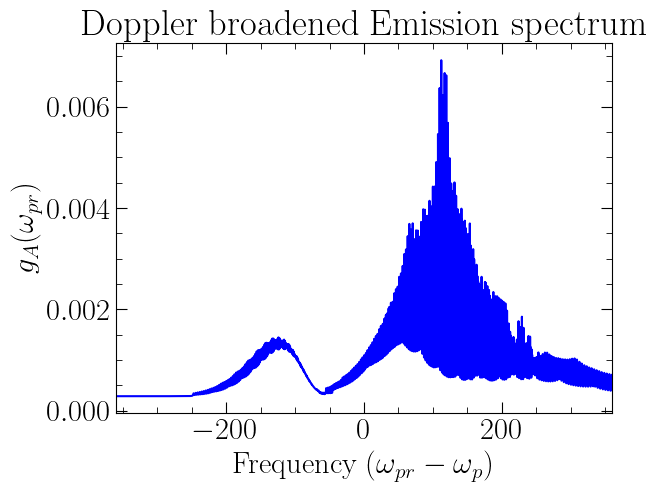

In [21]:
#Doppler averaging routine

vth=295.0
B0=0.0E-9

atom = arc.Rubidium87()
ens,fs,mfs=atom.breitRabi(5,0,0.5,np.array([B0]))
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0]
ensz=(ens-ens0)[0]
enp,fp,mfp=atom.breitRabi(5,1,1.5,np.array([B0]))
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0]
enpz=(enp-enp0)[0]

k=1.0E3/(780*6.0)
dsht=k*vth
R0x=180.0
dl0x=100.0
display(k*vth)
xtaulist=np.linspace(0.0,4.0E3,int(10.0E5))

Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])
vmin=-700
vmax=700
vlist=np.linspace(vmin,vmax,125)
dv=vlist[1]-vlist[0]
dlmax=dl0x+k*vmax
dlmin=dl0x+k*vmin

#Spectral lineshapes for a given x-velocity, pump detuning and Rabi frequency
def spectralv(v,dl0,R0,B0):
    xH0=(dl0+k*v)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
    xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
    xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
    HSx=xH0+xHzee+xHint+xHint.dag()
    xpss00=mesolve(HSx,psi0,np.linspace(-1000.0/Gamma,0.0,100),c_ops,[],options=opts).states[-1]
    xcorra=correlation_2op_2t(HSx, xpss00, [0.0], xtaulist, c_ops, Aop, Aop.dag(), reverse=False, args={})[0,:]
    xcorrf=correlation_2op_2t(HSx, xpss00, [0.0], xtaulist, c_ops, Aop.dag(), Aop, reverse=True, args={})[0,:]
    xwxlst,xspecx=spectrum_correlation_fft(xtaulist,xcorra-xcorrf)
    xwxlst11,xspecx11=spectrum_correlation_fft(xtaulist,xcorrf)

    xwxlstt=[x+dl0+k*v for x in xwxlst]
    
    return [xwxlstt, xspecx, xspecx11]

interlst=[]
wran=np.linspace(-700,700,10000)
abslst=np.array([wran])
flolst=np.array([wran])
avabslst=np.zeros(len(wran))
avflolst=np.zeros(len(wran))

#Create
for v in vlist:
    px=1.0/(np.sqrt(2.0*np.pi)*vth)*np.exp(-0.5*(v/vth)**2)*dv
    xwxlstt, xspecxa, xspecxe=spectralv(v,dl0x,R0x)
    xspecxa= xspecxa*px
    xspecxe= xspecxe*px
    #Interpolate function from data of spectral lineshapes
    p1 = lambda x: np.interp(x,xwxlstt, xspecxa)
    p2 = lambda x: np.interp(x,xwxlstt, xspecxe)
    #Find y-points for w-points in wran
    y1 = [p1(i) for i in wran]
    y2 = [p2(i) for i in wran]
    #Add datapoints as columns to array
    #abslst=np.append(abslst,[y1])
    #flolst=np.append(flolst,[y2])
    #Averaging operation adding all spectral lineshapes
    avabslst=np.add(avabslst,y1)
    avflolst=np.add(avflolst,y2)




    

display(k*23.4)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avabslst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Absorption spectrum')
ax.set_xlim(-360,360)
#ax.set_ylim(-0.2,0.3)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avflolst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Emission spectrum')
ax.set_xlim(-360,360)
#ax.set_ylim(-0.2,0.3)

-0.00023684055157240463

145.54455445544545

(0.0, 0.01)

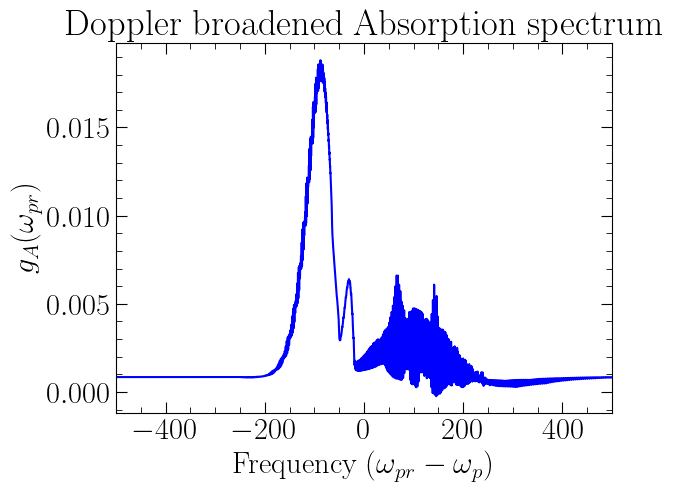

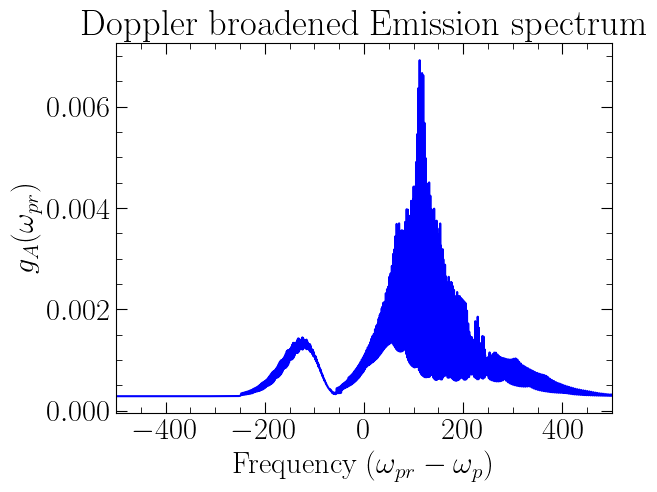

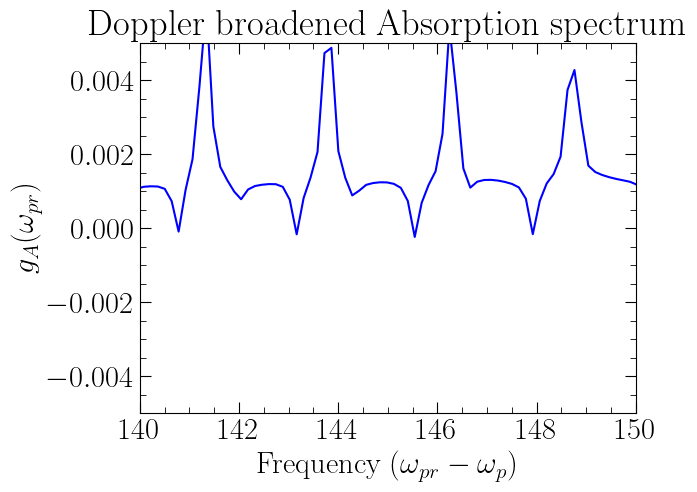

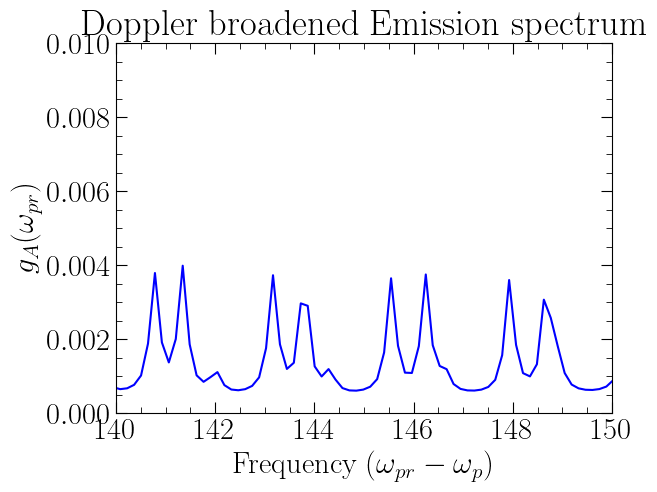

In [27]:
display(np.min(avabslst))
display(wran[np.argmin(avabslst)])
f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avabslst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Absorption spectrum')
ax.set_xlim(-500,500)
#ax.set_ylim(-0.2,0.3)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avflolst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Emission spectrum')
ax.set_xlim(-500,500)
#ax.set_ylim(-0.2,0.3)



'''
xwxlstt, xspecx, xspecx11=spectralv(0.0,dl0x,R0x)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(xwxlstt, np.real(xspecx),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Absorption spectrum')
ax.set_xlim(-150,150)
#ax.set_ylim(-0.2,0.3)
'''

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avabslst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Absorption spectrum')
ax.set_xlim(140,150)
ax.set_ylim(-0.005,0.005)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wran, np.real(avflolst),'b',label='Re S')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{p}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
#ax.legend()
ax.set_title('Doppler broadened Emission spectrum')
ax.set_xlim(140,150)
ax.set_ylim(0,0.01)

In [46]:
display(dv*k)
display(k*vmax)
display((xwxlstt[-1]-xwxlstt[0])/2)

2.513826043237805

149.57264957264957

628.3169599226136

2000.0/Gamma

(-25.0, 25.0)

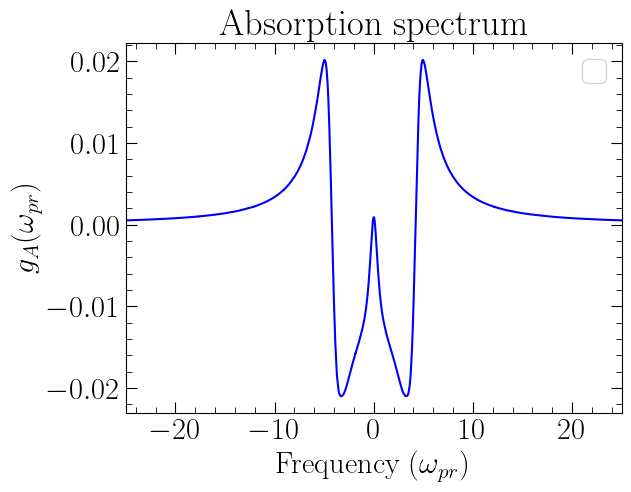

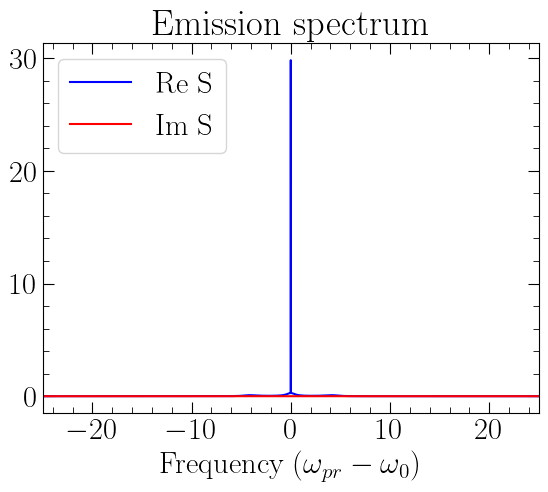

In [269]:
import csv as csv
taulist=np.linspace(0,4.0E3,int(4.0E5))
wlist=np.linspace(-100,100,10000)
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])


corra=correlation_2op_2t(HS21, pss0, [0.0], taulist, c_ops, Aop2, Aop2.dag(), reverse=False, args={})[0,:]
corrf=correlation_2op_2t(HS21, pss0, [0.0], taulist, c_ops, Aop2.dag(), Aop2, reverse=True, args={})[0,:]


wxlst,specx=spectrum_correlation_fft(taulist,corra-1.0*corrf)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlst, np.real(specx),'b',label='')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}$)")
ax.set_ylabel(r"$g_A(\omega_{pr})$")
ax.legend()
ax.set_title('Absorption spectrum')
ax.set_xlim(-25.0,25.0)

wxlst11,specx11=spectrum_correlation_fft(taulist,corrf)

f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(wxlst11, np.real(specx11),'b',label='Re S')
ax.plot(wxlst11, np.imag(specx11),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"Frequency ($\omega_{pr}-\omega_{0}$)")
ax.legend(loc='upper left')
ax.set_title('Emission spectrum')
ax.set_xlim(-25.0,25.0)



#plt.savefig('Mollow2par.png', bbox_inches='tight')

Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])
expect(Aop2.dag()*Aop2,pss0)


In [273]:
Aop=mu_16*(zb[0,5])+mu_18*(zb[0,7])+mu_27*(zb[1,6])+mu_29*(zb[1,8])+\
         mu_38*(zb[2,7])+mu_310*(zb[2,9])+mu_49*(zb[3,8])+mu_411*(zb[3,10])+mu_510*(zb[4,9])+mu_512*(zb[4,11])
Aop2=mu_17*(zb[0,6])+mu_28*(zb[1,7])+mu_39*(zb[2,8])+mu_410*(zb[3,9])+mu_511*(zb[4,10])




In [287]:
Arho=Aop2.dag()*Aop2*Aop2.dag()*pss0+pss0*Aop2.dag()*Aop2*Aop2.dag()+\
Aop2*Aop2.dag()*pss0*Aop2.dag()+Aop2.dag()*Aop2*pss0*Aop2.dag()+\
Aop2*pss0*Aop2.dag()*Aop2.dag()+Aop2.dag()*Aop2.dag()*pss0*Aop2+\
Aop2.dag()*pss0*Aop2*Aop2.dag()+Aop2.dag()*pss0*Aop2.dag()*Aop2
display(wstep)

0.0012566345481617946

In [16]:
import scipy as scipy

Nr=100
#Nsteps=int(4.0E5)

wlist=np.linspace(-10.0,10.0,1000)
Rabilist=np.linspace(0.05,5.0,150)
wplist=np.linspace(-5.0,5.0,100)
D1r0=0.0
Rb0=4.0
wparlist=[]
wperlist=[]
sparlist=[]
sparlist2=[[0,0,0]]
sarealist=[]
xsplist=[]

wsplist=[]
gsplist=[]
gspelist=[]
sperlist=[]

plt.rcParams.update({'font.size': 22})
def CW0(t,args):
    return np.exp(-1j*D1r0*t)

def CW0c(t,args):
    return np.exp(1j*D1r0*t)

for x in wplist:
    xspecxa=cspectrum_abs(Rb0,x,0.0,wlist,c_ops,Aop,Aop.dag(), use_pinv=True)
    xspecxf=cspectrum_rev(Rb0,x,0.0,wlist,c_ops,Aop,Aop.dag(), use_pinv=True)
    #sparea=np.trapz(xae1,dx=wstep)
    #xe0,xe1=spectrum_correlation_fft(taulist,corrpera-1.0*corrperf)
    #wxlasper=(xe0[Nx1:Nx2],xe1[Nx1:Nx2])
    #spar=(np.array(np.real(xa1))).min()
    #sper=(np.array(np.real(wxlasper[1]))).min()
    #wpar=wxlaspar[0][(np.array(np.real(wxlaspar[1]))).argmin()]
    #wper=wxlasper[0][(np.array(np.real(wxlasper[1]))).argmin()]
    #wparlist=np.append(wparlist,wpar)
    #wperlist=np.append(wperlist,wper)
    #sparlist=np.append(sparlist,spar)
    xsplist=np.append(xsplist,[x]*len(wlist))
    wsplist=np.append(wsplist,wlist)
    gsplist=np.append(gsplist,xspecxa)
    gspelist=np.append(gspelist,xspecxa)
    '''
    for nx in np.arange(0,len(xa0)-1):
        sparlist2=np.append(sparlist2, [[x,xa0[nx],xa1[nx]]],axis=0)
    '''
    #sperlist=np.append(sperlist,sper)

import pandas as pd
df11list={'Pump Detuning': list(xsplist), '2P Detuning': list(wsplist), 'g_A': list(gsplist), 'g_E': list(gspelist)}
df11 = pd.DataFrame(data=df11list)
#df1 = pd.DataFrame(list(zip(Rabilist,sparlist))).add_prefix('Col')
#df2 = pd.DataFrame(list(zip(Rabilist,sperlist))).add_prefix('Col')
df11.to_csv('Fig4CP1.csv', index=False)
#df2.to_csv('FigX2edata0.csv', index=False)

'''
f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(Rabilist, sparlist,'b',label='')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"$\Omega_p$[$\Gamma$]")
ax.set_ylabel(r"$\min{}g_A(\omega)$")
ax.legend()
#ax.set_title('Absorption spectrum')
#plt.savefig('Freqdiagper3.png', bbox_inches='tight')




f, ax = plt.subplots()
#ax.plot(sat, popcohm00,'r',label='p26')
ax.plot(Rabilist, sperlist,'b',label='')
#ax.plot(wxlst, np.imag(specx),'r',label='Im S')
#ax.set_xlim([175.0/Gamma,225.0/Gamma])
ax.set_xlabel(r"$\Omega_p$[$\Gamma$]")
ax.set_ylabel(r"$\min{}g_A(\omega)$")
ax.legend()
#ax.set_title('Absorption spectrum')
#plt.savefig('Freqdiagpar3.png', bbox_inches='tight')
'''

'\nf, ax = plt.subplots()\n#ax.plot(sat, popcohm00,\'r\',label=\'p26\')\nax.plot(Rabilist, sparlist,\'b\',label=\'\')\n#ax.plot(wxlst, np.imag(specx),\'r\',label=\'Im S\')\n#ax.set_xlim([175.0/Gamma,225.0/Gamma])\nax.set_xlabel(r"$\\Omega_p$[$\\Gamma$]")\nax.set_ylabel(r"$\\min{}g_A(\\omega)$")\nax.legend()\n#ax.set_title(\'Absorption spectrum\')\n#plt.savefig(\'Freqdiagper3.png\', bbox_inches=\'tight\')\n\n\n\n\nf, ax = plt.subplots()\n#ax.plot(sat, popcohm00,\'r\',label=\'p26\')\nax.plot(Rabilist, sperlist,\'b\',label=\'\')\n#ax.plot(wxlst, np.imag(specx),\'r\',label=\'Im S\')\n#ax.set_xlim([175.0/Gamma,225.0/Gamma])\nax.set_xlabel(r"$\\Omega_p$[$\\Gamma$]")\nax.set_ylabel(r"$\\min{}g_A(\\omega)$")\nax.legend()\n#ax.set_title(\'Absorption spectrum\')\n#plt.savefig(\'Freqdiagpar3.png\', bbox_inches=\'tight\')\n'

In [3]:
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import RectBivariateSpline

Nr=100
#Nsteps=int(4.0E5)
Npts=10
Rb0=4.0
B00=0.0


def cspectrum_abs2(R0,dl0,B0x, wlist, c_ops, a_op, b_op, use_pinv=False):
    r"""
    Internal function for calculating the spectrum of the correlation function
    :math:`\left<A(\tau)B(0)\right>`.
    """
    

    xH0=(dl0)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
    xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
         0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
         0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
           0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
           0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
    '''
    atom = arc.Rubidium87()
    #F=2
    ens=atom.breitRabi(5,0,0.5,np.array([B0x]))[0][0][3:]
    ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
    ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
    #F=3
    enp=atom.breitRabi(5,1,1.5,np.array([B0x]))[0][0][9:]
    enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
    enpz=(enp-enp0)/(2.0*np.pi*6.0E6)
    xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
     (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
    '''
    #HSx=xH0+xHzee+xHint+xHint.dag()
    HSx=xH0+xHint+xHint.dag()
    L = HSx if issuper(HSx) else liouvillian(HSx, c_ops)

    tr_mat = qp.tensor([qeye(n) for n in L.dims[0][0]])
    N = np.prod(L.dims[0][0])

    A = L.full()
    b= spre(b_op).full()
    bt = spost(b_op).full()
    a = spre(a_op).full()

    tr_vec = np.transpose(mat2vec(tr_mat.full()))

    rho_ss = steadystate(L)
    rho = np.transpose(mat2vec(rho_ss.full()))

    I = np.identity(N * N)
    P = np.kron(np.transpose(rho), tr_vec)
    Q = I - P

    spectrum = np.zeros(len(wlist))

    for idx, w in enumerate(wlist):
        if use_pinv:
            MMR = np.linalg.pinv(-1.0j * w * I + A)
        else:
            MMR = np.dot(Q, np.linalg.solve(-1.0j * w * I + A, Q))

        s = np.dot(tr_vec,
                   np.dot(a, np.dot(MMR, np.dot(b-bt, np.transpose(rho)))))
        spectrum[idx] = -2 * np.real(s[0, 0])

    return spectrum

'''
wlist=np.linspace(-20.0,20.0,4001)
wlist2=np.linspace(-10.0,10.0,1001)
Rabilist=np.linspace(0.05,5.0,150)

wplist=np.linspace(-5.0,5.0,100)
wvlist=np.linspace(-5.0,5.0,1000)

pts=np.meshgrid(wlist, wlist2, indexing='ij', sparse=True)
data = np.zeros((len(wlist),len(wlist2)))

for i in np.arange(0,len(wlist),step=1,dtype=int):
    for j in np.arange(0,len(wlist2),step=1,dtype=int):
        data[i,j]=cspectrum_abs2(Rb0,wlist2[j],B00,[wlist[i]], c_ops, Aop, Aop.dag(), use_pinv=True)[0]

interp = RectBivariateSpline(wlist, wlist2,data,kx=3, ky=3, s=0.0)
display(interp(0.1,0.1))


D1r0=0.0
'''




"\nwlist=np.linspace(-20.0,20.0,4001)\nwlist2=np.linspace(-10.0,10.0,1001)\nRabilist=np.linspace(0.05,5.0,150)\n\nwplist=np.linspace(-5.0,5.0,100)\nwvlist=np.linspace(-5.0,5.0,1000)\n\npts=np.meshgrid(wlist, wlist2, indexing='ij', sparse=True)\ndata = np.zeros((len(wlist),len(wlist2)))\n\nfor i in np.arange(0,len(wlist),step=1,dtype=int):\n    for j in np.arange(0,len(wlist2),step=1,dtype=int):\n        data[i,j]=cspectrum_abs2(Rb0,wlist2[j],B00,[wlist[i]], c_ops, Aop, Aop.dag(), use_pinv=True)[0]\n\ninterp = RectBivariateSpline(wlist, wlist2,data,kx=3, ky=3, s=1.0)\ndisplay(interp(0.1,0.1))\n\n\nD1r0=0.0\n"

In [180]:
interp2 = RectBivariateSpline(wlist, wlist2,data,kx=3, ky=3, s=0.0)
wvth=0.5
dwv=wvlist[1]-wvlist[0]
#display(interp2(0.71,0.3)[0][0])
#display(cspectrum_abs2(Rb0,0.71,B00,[0.3], c_ops, Aop, Aop.dag(), use_pinv=True)[0])
wparlist=[]
wperlist=[]
sparlist=[]
sparlist2=[[0,0,0]]
sarealist=[]
xsplist=[]

wsplist=[]
gsplist=[]
gspelist=[]
sperlist=[]

for wx in wplist:
    xspecxa=[0.0]*len(wlist2)
    if wvth==0.0:
        xspecxa+=interp2([x-(wx) for x in wlist2],wx)[:,0]
    else:
        for wd in wvlist:
            px=1.0/(np.sqrt(2.0*np.pi)*wvth)*np.exp(-0.5*(wd/wvth)**2)*dwv
            xspecxa+=px*interp2([x-(wx+wd) for x in wlist2],wx+wd)[:,0]
            
    xsplist=np.append(xsplist,[wx]*len(wlist2))
    wsplist=np.append(wsplist,wlist2)
    gsplist=np.append(gsplist,xspecxa)
    '''
    for nx in np.arange(0,len(xa0)-1):
        sparlist2=np.append(sparlist2, [[x,xa0[nx],xa1[nx]]],axis=0)
    '''
    #sperlist=np.append(sperlist,sper)

import pandas as pd
df11list={'Pump detuning': list(xsplist), 'Probe detuning': list(wsplist), 'g_A': list(gsplist)}
df11 = pd.DataFrame(data=df11list)
#df1 = pd.DataFrame(list(zip(Rabilist,sparlist))).add_prefix('Col')
#df2 = pd.DataFrame(list(zip(Rabilist,sperlist))).add_prefix('Col')
df11.to_csv('Fig4CP0dop.csv', index=False)
#df2.to_csv('FigX2edata0.csv', index=False)

In [177]:
'''
display(interp2([x+0.1 for x in [0.1,0.2,0.3]],0.3)[:,0])
l1=[1]*len(interp2([x+0.1 for x in [0.1,0.2,0.3]],0.3)[:,0])
display([x+0.1 for x in [0.1,0.2,0.3]])
display(l1+interp2([x+0.1 for x in [0.1,0.2,0.3]],0.3)[:,0])
'''
np.savetxt('gapumpvsprobe4Rv1.txt', data)

In [ ]:
wlist=np.linspace(-20.0,20.0,1001)
wlist2=np.linspace(-10.0,10.0,251)
Rabilist=np.linspace(0.05,5.0,25)

wplist=np.linspace(-5.0,5.0,100)
wvlist=np.linspace(-5.0,5.0,126)



pts2=np.meshgrid(wlist,wlist2,Rabilist, indexing='ij', sparse=True)
data2 = np.zeros((len(wlist),len(wlist2),len(Rabilist)))

for i in np.arange(0,len(wlist),step=1,dtype=int):
    for j in np.arange(0,len(wlist2),step=1,dtype=int):
        for k in np.arange(0,len(Rabilist),step=1,dtype=int):
            data2[i,j,k]=cspectrum_abs2(Rabilist[k],wlist2[j],B00,[wlist[i]], c_ops, Aop, Aop.dag(), use_pinv=True)[0]

data2_reshaped = data2.reshape(data2.shape[0], -1) 
np.savetxt("gaRabiPvsprobe4Rv101.csv", data2_reshaped)      
interp = RectBivariateSpline(wlist,wlist2,Rabilist,data,kx=3, ky=3, s=0.0)
interp2 = RectBivariateSpline(wlist,wlist2,Rabilist,data,kx=3, ky=3, s=0.4)

In [26]:
wlist=np.linspace(-20.0,20.0,1001)
wlist2=np.linspace(-10.0,10.0,251)
Rabilist=np.linspace(0.05,5.0,25)

xg,yg,zg=np.meshgrid(wlist,wlist2,Rabilist, indexing='ij', sparse=True)
interp3 = RegularGridInterpolator((wlist,wlist2,Rabilist), data2,method="linear",
                                 bounds_error=False, fill_value=None)

In [23]:
import pandas as pd


dwp=2.0
wvth=0.0

wvlist=np.linspace(-5.0,5.0,126)
dwv=wvlist[1]-wvlist[0]
wlistx=np.linspace(-15.0,15.0,1000)
wlist2x=np.linspace(-5.0,5.0,250)
wlist2y=np.linspace(-10.0,10.0,251)
Rabilistx=np.linspace(0.05,5.0,100)

xsplist=[]

wsplist=[]
gsplist=[]
arrwrite=[]
for Rbx in Rabilistx:
    xspecxa=[0.0]*len(wlist2y)
    
    if wvth==0.0:
        xspecxa+=interp3([[x-(dwp),dwp,Rbx] for x in wlist2y])
    else:
        for wd in wvlist:
            px=1.0/(np.sqrt(2.0*np.pi)*wvth)*np.exp(-0.5*(wd/wvth)**2)*dwv
            xspecxa+=px*interp3([[x-(dwp+wd),dwp+wd,Rbx] for x in wlist2y])
            
    xsplist=np.append(xsplist,[Rbx]*len(wlist2y))
    wsplist=np.append(wsplist,wlist2y)
    gsplist=np.append(gsplist,xspecxa)
    
    '''
    for nx in np.arange(0,len(xa0)-1):
        sparlist2=np.append(sparlist2, [[x,xa0[nx],xa1[nx]]],axis=0)
    '''
    #sperlist=np.append(sperlist,sper)
#isplay(arrwrite)
df11list={'Rabi Frequency': list(xsplist), 'Probe detuning': list(wsplist), 'g_A': list(gsplist)}
df11 = pd.DataFrame(data=df11list)
#df1 = pd.DataFrame(list(zip(Rabilist,sparlist))).add_prefix('Col')
#df2 = pd.DataFrame(list(zip(Rabilist,sperlist))).add_prefix('Col')
df11.to_csv('Fig4RabiProbedt2dp0test.csv', index=False)



'''
column_values = ['Probe detuning', 'Pump detuning', 'Rabi frequency','g_A'] 
df12 = pd.DataFrame(data = arrwrite, columns = column_values)
df12.to_csv('ProbDetPumpDetRabi0.csv', index=False)
'''
#display(data2[500,125,10])
#display(interp([wlist[500]+0.25,wlist2[125]+0.04,Rabilist[10]+0.4])[0])
#display(cspectrum_abs2(Rabilist[10]+0.4,wlist2[125]+0.04,B00,[wlist[500]+0.25], c_ops, Aop, Aop.dag(), use_pinv=True)[0])

#3D Array reshape and save
#data2_reshaped = data2.reshape(data2.shape[0], -1) 
#np.savetxt("gaRabiPvsprobe4Rv10.txt.txt", data2_reshaped)



"\ncolumn_values = ['Probe detuning', 'Pump detuning', 'Rabi frequency','g_A'] \ndf12 = pd.DataFrame(data = arrwrite, columns = column_values)\ndf12.to_csv('ProbDetPumpDetRabi0.csv', index=False)\n"

In [20]:
wlist=np.linspace(-20.0,20.0,1001)
wlist2=np.linspace(-10.0,10.0,251)
Rabilist=np.linspace(0.05,5.0,25)
arr = np.zeros((len(wlist),len(wlist2),len(Rabilist)))
#Array load
loaded_arr = np.loadtxt("gaRabiPvsprobe4Rv10.txt") 
#Reshape array into original 3D

load_original_arr = loaded_arr.reshape( 
    loaded_arr.shape[0], loaded_arr.shape[1] // arr.shape[2], arr.shape[2])

data2 = load_original_arr

In [ ]:


for Rbx in Rabilist:
    xspecxa=[0.0]*len(wlist2)
    if wvth==0.0:
        xspecxa+=interp([x-(0.5) for x in wlist2],Rbx)[:,0]
    else:
        for wd in wvlist:
            px=1.0/(np.sqrt(2.0*np.pi)*wvth)*np.exp(-0.5*(wd/wvth)**2)*dwv
            xspecxa+=px*interp2([x-(0.5+wd) for x in wlist2],wx+wd)[:,0]
            
    xsplist=np.append(xsplist,[wx]*len(wlist2))
    wsplist=np.append(wsplist,wlist2)
    gsplist=np.append(gsplist,xspecxa)
    '''
    for nx in np.arange(0,len(xa0)-1):
        sparlist2=np.append(sparlist2, [[x,xa0[nx],xa1[nx]]],axis=0)
    '''
    #sperlist=np.append(sperlist,sper)

import pandas as pd
df11list={'Pump detuning': list(xsplist), 'Probe detuning': list(wsplist), 'g_A': list(gsplist)}
df11 = pd.DataFrame(data=df11list)
#df1 = pd.DataFrame(list(zip(Rabilist,sparlist))).add_prefix('Col')
#df2 = pd.DataFrame(list(zip(Rabilist,sperlist))).add_prefix('Col')
df11.to_csv('Fig4CP0dop.csv', index=False)
#df2.to_csv('FigX2edata0.csv', index=False)



In [93]:
import qutip as qp
dl0=4.0
R0=10.0

xH0=(dl0)*(zb[5,5]+zb[6,6]+zb[7,7]+zb[8,8]+zb[9,9]+zb[10,10]+zb[11,11])
xHint=1.0*R0*(0.0*mu_16*(zb[0,5])+mu_17*(zb[0,6])+0.0*mu_18*(zb[0,7])+\
     0.0*mu_27*(zb[1,6])+mu_28*(zb[1,7])+0.0*mu_29*(zb[1,8])+\
     0.0*mu_38*(zb[2,7])+mu_39*(zb[2,8])+0.0*mu_310*(zb[2,9])+\
       0.0*mu_49*(zb[3,8])+mu_410*(zb[3,9])+0.0*mu_411*(zb[3,10])+\
       0.0*mu_510*(zb[4,9])+mu_511*(zb[4,10])+0.0*mu_512*(zb[4,11]))
'''
atom = arc.Rubidium87()
#F=2
ens=atom.breitRabi(5,0,0.5,np.array([B0x]))[0][0][3:]
ens0=atom.breitRabi(5,0,0.5,np.array([0.0]))[0][0][3:]
ensz=(ens-ens0)/(2.0*np.pi*6.0E6)
#F=3
enp=atom.breitRabi(5,1,1.5,np.array([B0x]))[0][0][9:]
enp0=atom.breitRabi(5,1,1.5,np.array([0.0]))[0][0][9:]
enpz=(enp-enp0)/(2.0*np.pi*6.0E6)
xHzee=(ensz[0])*zb[0,0]+(ensz[1])*zb[1,1]+(ensz[2])*zb[2,2]+(ensz[3])*zb[3,3]+(ensz[4])*zb[4,4]+(enpz[0])*zb[5,5]+(enpz[1])*zb[6,6]+(enpz[2])*zb[7,7]+\
 (enpz[3])*zb[8,8]+(enpz[4])*zb[9,9]+(enpz[5])*zb[10,10]+(enpz[6])*zb[11,11]
'''
#HSx=xH0+xHzee+xHint+xHint.dag()
HSx=xH0+xHint+xHint.dag()
L = HSx if issuper(HSx) else liouvillian(HSx, c_ops)

A = L.full()

display(zb[0,5])

Quantum object: dims = [[12], [12]], shape = (12, 12), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]